In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

### MLP를 two_moons 데이터셋에 적용
- 은닉 유닛의 개수는 따로 설정 x
- 기본 값은 100

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [3]:
x, y= make_moons(n_samples= 100, noise= 0.25, random_state= 3)

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   stratify= y,
                                                   random_state= 42)

In [4]:
mlp= MLPClassifier(solver= 'lbfgs', random_state= 0).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

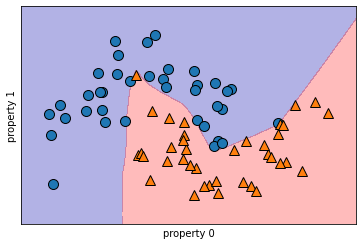

In [5]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [6]:
# 은닉 유닛의 수 10개로 감소

In [7]:
mlp= MLPClassifier(solver= 'lbfgs',
                   random_state= 0,
                   hidden_layer_sizes= [10]).fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'property 1')

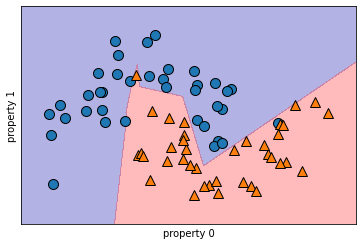

In [8]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

이 데이터셋에서 유닛의 개수를 줄여도 여전히 좋은 결과를 얻을 수 있음
더 매끄러운 결정 경계를 원할 경우 다음과 같은 매개 변수 조정을 생각할 수 있음
- 은닛 유닛 추가
- 은닉층 추가
- 활성화 함수 사용

In [9]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp= MLPClassifier(solver= 'lbfgs',
                   random_state= 0,
                   hidden_layer_sizes= [10, 10]).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

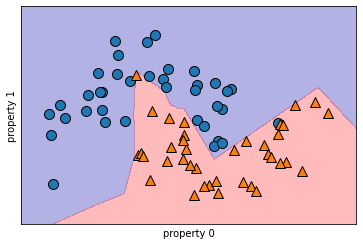

In [10]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [11]:
# 10개의 유닛으로 된 두 개의 은닉층에 활성화 함수 추가
mlp= MLPClassifier(solver= 'lbfgs',
                   activation= 'tanh',
                   random_state= 0,
                   hidden_layer_sizes= [10, 10]).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

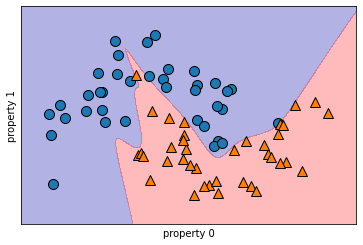

In [12]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

#### 가중치 
- MLP 신경망 모델도 릿지 회귀에서처럼 L2 패널티를 사용하여 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어 가능

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


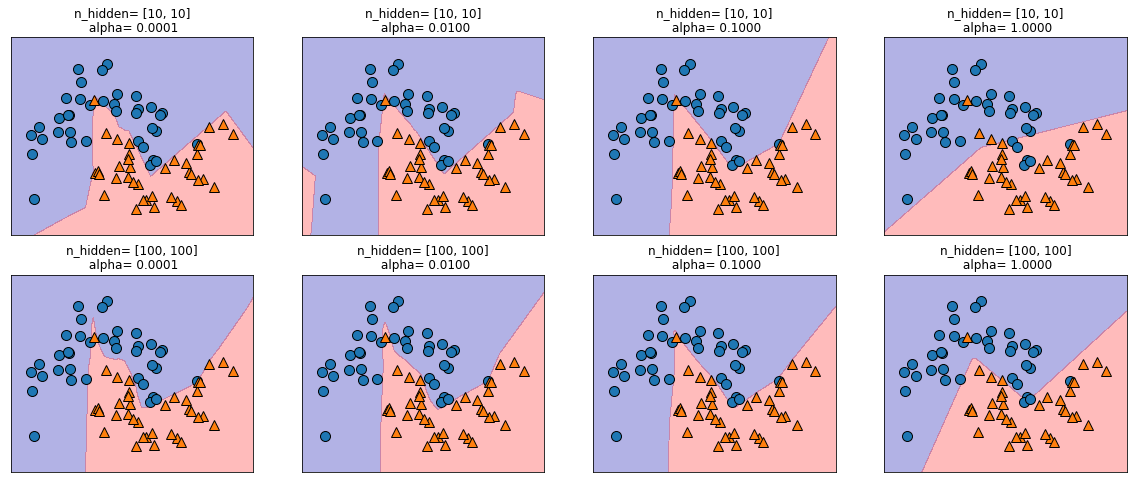

In [13]:
fig, axes= plt.subplots(2, 4, figsize= (20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp= MLPClassifier(solver= 'lbfgs',
                           random_state= 0,
                           hidden_layer_sizes= [n_hidden_nodes, n_hidden_nodes],
                           alpha= alpha).fit(x_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3, ax=ax)
        mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden= [{}, {}]\n alpha= {:.4f}'.format(n_hidden_nodes,
                                                                 n_hidden_nodes,
                                                                 alpha))

### 초기 무작위 가중치

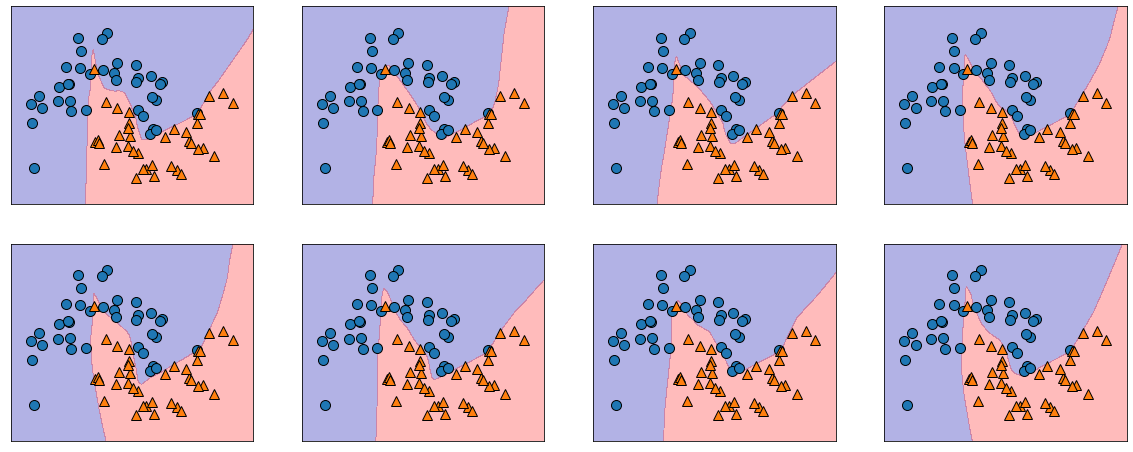

In [14]:
fig, axes= plt.subplots(2, 4, figsize= (20, 8))

for i, ax in enumerate(axes.ravel()): # 1차원 변환
    mlp= MLPClassifier(solver= 'lbfgs', 
                       random_state= i, 
                       hidden_layer_sizes= [100, 100]).fit(x_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, x_train, fill= True, alpha= 0.3, ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)